T1-T9. Completed

T10. Propose ways to improve the machine learning models you have implemented. You can either propose new machine learning models, new ways of sampling/using the training data, or propose new features. You are allowed to use existing libraries/packages for this part.

In [3]:
import numpy as np
import pandas as pd
import xgboost


In [19]:
#!pip install xgboost

    100% |████████████████████████████████| 481kB 515kB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/sherlock/.cache/pip/wheels/44/75/71/94198575ab2a2946397287601c0632d196bc56a7ff4b985aba
Successfully built xgboost
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [154]:
#import the training set 
Pred_Train_features = pd.read_csv('/project/Pred_Train_features.csv')
Pred_Test_features = pd.read_csv('/project/Pred_Test_features.csv')

In [155]:
# Map Each Stance to a label
def stance_to_flag(stance):
    if stance == 'agree':
        return 1
    elif stance == 'disagree':
        return 2
    elif stance == 'discuss':
        return 3
    else:
        return 4

In [156]:
Pred_Train_features['y'] = Pred_Train_features['Stance'].map(stance_to_flag)
Pred_Test_features['y'] = Pred_Test_features['Stance'].map(stance_to_flag)

In [157]:
Pred_Train_features.head(2)

,Headline,Body_ID,articleBody,Stance,cos_sim_w2v,cos_sim_tfidf,overlap,polar_h,polar_b,P_Cor_Coe_w2c,P_Cor_Coe_tfidf,Euc_distance_w2c,Euc_distance_tfidf,kl_dis,LM_kld,y
0,police find mass graf least body near mexico t...,712,danny boyle directing untitled film seth rogen...,unrelated,-0.243617,-2.220446e-16,0.000000,0,0,-0.234044,-0.001445,1.577097,1.117929,118.890038,2.200789,4
1,seth rogen play apple steve wozniak,712,danny boyle directing untitled film seth rogen...,discuss,0.851035,3.301286e-01,0.065217,0,0,0.849136,0.329755,0.545830,1.447857,8.457826,0.401247,3


In [158]:
Pred_Train_features.columns.get_values()

array(['Headline', 'Body_ID', 'articleBody', 'Stance', 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld', 'y'], dtype=object)

In [159]:
Pred_Test_features.columns.get_values()

array(['Headline', 'Body_ID', 'articleBody', 'Stance', 'cos_sim_tfidf',
       'cos_sim_w2v', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld', 'y'], dtype=object)

In [160]:
from sklearn.cross_validation import train_test_split
def trts_split(df):
    tts_df = df.copy()
    X = tts_df[['Headline', 'Body_ID', 'articleBody', 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld','y']]
    y = tts_df['Stance']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=123)
    Xy_train = pd.concat([X_train,y_train],axis=1)
    Xy_valid = pd.concat([X_valid,y_valid],axis=1)
    return  Xy_train, Xy_valid

In [161]:
All_agree = Pred_Train_features[Pred_Train_features['Stance']=='agree']
All_disagree = Pred_Train_features[Pred_Train_features['Stance']=='disagree']
All_discuss = Pred_Train_features[Pred_Train_features['Stance']=='discuss']
All_unrelated = Pred_Train_features[Pred_Train_features['Stance']=='unrelated']

In [162]:
Train_df_agree, Valid_df_agree = trts_split(All_agree)
Train_df_disagree, Valid_df_disagree = trts_split(All_disagree)
Train_df_discuss, Valid_df_discuss = trts_split(All_discuss)
Train_df_unrelated, Valid_df_unrelated = trts_split(All_unrelated)

Train_set = pd.concat([Train_df_agree,Train_df_disagree,Train_df_discuss,Train_df_unrelated])
Valid_set = pd.concat([Valid_df_agree,Valid_df_disagree,Valid_df_discuss,Valid_df_unrelated])
print(Train_set.count(),Valid_set.count())

Headline              44974
Body_ID               44974
articleBody           44974
cos_sim_w2v           44974
cos_sim_tfidf         44974
overlap               44974
polar_h               44974
polar_b               44974
P_Cor_Coe_w2c         44974
P_Cor_Coe_tfidf       44974
Euc_distance_w2c      44974
Euc_distance_tfidf    44974
kl_dis                44974
LM_kld                44974
y                     44974
Stance                44974
dtype: int64 Headline              4998
Body_ID               4998
articleBody           4998
cos_sim_w2v           4998
cos_sim_tfidf         4998
overlap               4998
polar_h               4998
polar_b               4998
P_Cor_Coe_w2c         4998
P_Cor_Coe_tfidf       4998
Euc_distance_w2c      4998
Euc_distance_tfidf    4998
kl_dis                4998
LM_kld                4998
y                     4998
Stance                4998
dtype: int64


In [165]:
#Select Training Features. I would like to use cos_sim_tfidf, overlap, P_Cor_Coe_tfidf, polar_h, polar_b to tring the model
X_train =  Train_set[['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]
X_valid = Valid_set[['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]
X_test = Pred_Test_features[['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]


In [83]:
X_train=Train_set[[ 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis','LM_kld']]

X_valid = Valid_set[[ 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld']]

X_test =Pred_Test_features[[ 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld']]


In [166]:
X_train

,cos_sim_tfidf,overlap,P_Cor_Coe_tfidf,Euc_distance_tfidf,LM_kld
21984,3.834205e-01,0.064220,0.382978,0.948548,0.696868
37301,3.129295e-01,0.030973,0.312388,1.618317,0.542756
43316,2.750198e-01,0.032520,0.274456,1.386999,0.876178
31986,4.364389e-01,0.018462,0.436695,1.270246,0.302841
39781,2.414423e-01,0.025974,0.240757,1.619479,1.079707
35735,2.897135e-01,0.028571,0.289330,2.138130,0.708453
11874,3.530429e-01,0.060976,0.352382,0.978596,0.599071
46041,1.622031e-01,0.050847,0.161597,1.584669,1.426888
29530,6.837929e-01,0.078431,0.683954,1.214142,0.194267
42570,3.700648e-01,0.045833,0.369829,0.951140,0.361660


In [167]:
#train xgboost model
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

X = X_train
y = Train_set['y']
# train the default model
xgb = xgboost.XGBClassifier()
xgb.fit(X, y)

gnb = GaussianNB()
gnb.fit(X, y)

knn = KNeighborsClassifier()
knn.fit(X, y)

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

clf = DecisionTreeClassifier()
clf.fit(X, y)

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
clf.feature_importances_

array([0.05328222, 0.08007891, 0.67840798, 0.10588506, 0.08234584])

### Validation, Test and Evaluation 

In [169]:
#test the default model
valid_x = X_valid
#test_predictions = model.predict_proba(test_x)
valid_xgb_predictions_class = xgb.predict(valid_x)
valid_gnb_predictions_class = gnb.predict(valid_x)
valid_knn_predictions_class = knn.predict(valid_x)
valid_lda_predictions_class = lda.predict(valid_x)
valid_clf_predictions_class = clf.predict(valid_x)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [170]:
valid_clf_predictions_class

array([1, 1, 1, ..., 4, 4, 4])

In [171]:
valid_result = pd.DataFrame(columns=['result', 'xgb_predict','gnb_predict','knn_predict','lda_predict','clf_predict'])  
valid_result['result']= Valid_set['y'].copy()
valid_result['xgb_predict'] = valid_xgb_predictions_class
valid_result['gnb_predict'] = valid_gnb_predictions_class
valid_result['knn_predict'] = valid_knn_predictions_class
valid_result['lda_predict'] = valid_lda_predictions_class
valid_result['clf_predict'] = valid_clf_predictions_class

#test_result['click_pred_class'] = test_predictions_class
valid_result.head()

,result,xgb_predict,gnb_predict,knn_predict,lda_predict,clf_predict
47914,1,3,3,1,3,1
47955,1,3,3,1,3,1
23222,1,1,1,1,1,1
18332,1,3,3,3,3,3
49918,1,3,3,3,3,1


In [172]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report

def evaluation(result_df, model_name):
    y_test = result_df['result']
    y_pred_class = result_df[model_name]

    confusion = confusion_matrix(y_test, y_pred_class)
    print(confusion)

    #（Classification Accuracy）
    print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )
    print(classification_report(y_test, y_pred_class))

    %matplotlib inline
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(confusion,annot=True, fmt='d',xticklabels=['argee', 'disagree', 'discuss','unrelated'], yticklabels=['argee', 'disagree', 'discuss','unrelated'],cmap='GnBu' )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

[[ 123   24  209   12]
 [  21   16   43    4]
 [ 198   47  593   53]
 [  17    2   45 3591]]
Accuracy: 86.494598%
             precision    recall  f1-score   support

          1       0.34      0.33      0.34       368
          2       0.18      0.19      0.18        84
          3       0.67      0.67      0.67       891
          4       0.98      0.98      0.98      3655

avg / total       0.86      0.86      0.86      4998



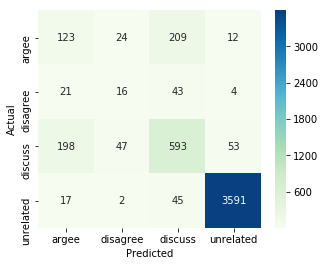

In [173]:
evaluation(valid_result,'clf_predict')

In [174]:
#test the default model
test_x = X_test
#test_predictions = model.predict_proba(test_x)
test_xgb_predictions_class = xgb.predict(test_x)
test_gnb_predictions_class = gnb.predict(np.nan_to_num(test_x))
test_knn_predictions_class = knn.predict(np.nan_to_num(test_x))
test_lda_predictions_class = lda.predict(np.nan_to_num(test_x))
test_clf_predictions_class = clf.predict(np.nan_to_num(test_x))

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [175]:
len(test_x)

25413

In [176]:
test_result = pd.DataFrame(columns=['result', 'xgb_predict','gnb_predict','knn_predict','lda_predict','clf_predict'])  
test_result['result']= Pred_Test_features['y'].copy()
test_result['xgb_predict'] = test_xgb_predictions_class
test_result['gnb_predict'] =  test_gnb_predictions_class
test_result['knn_predict'] =  test_knn_predictions_class
test_result['lda_predict'] =  test_lda_predictions_class
test_result['clf_predict'] =  test_clf_predictions_class
test_result.head()

,result,xgb_predict,gnb_predict,knn_predict,lda_predict,clf_predict
0,4,4,4,4,4,4
1,4,4,4,4,4,4
2,4,4,4,1,4,4
3,4,4,4,4,4,4
4,3,3,3,3,3,3


[[  681   135   961   126]
 [  218    52   322   105]
 [ 1387   319  2400   358]
 [  162    47   336 17804]]
Accuracy: 82.386967%
             precision    recall  f1-score   support

          1       0.28      0.36      0.31      1903
          2       0.09      0.07      0.08       697
          3       0.60      0.54      0.57      4464
          4       0.97      0.97      0.97     18349

avg / total       0.83      0.82      0.82     25413



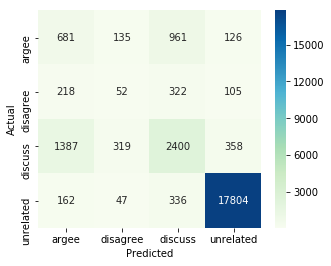

In [182]:
evaluation(test_result,'clf_predict')